<a href="https://colab.research.google.com/github/ilacheUFF/Simular_ETE/blob/main/TCC_Simula_ETE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade plotly  #Instalar biblioteca para graficos / Alternativa ao Matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Esse código será rodado com dados do trabalho M.C.Matheus que usa o artigo do Teymour e o trab do Ganesan como referências.


In [ ]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd

#Tanque de areação completo (com valores para variaveis iniciais)




In [ ]:
def Tanque(Y, t,   Roi =2, a = 10361*0.8):   #Roi inicialment era uma constante igual a 2, mas depois assumiu o valor da equação da taxa (R) 
    So,Sno, SNH, Snd, Xnd, Xp, Ss, Xs, XBA, XBH = Y

    #a = 497328*0,01     #esses valores era antes de ver a faixa de funcionamento de kla que é de a igual a zero ate 14000 m3/dia
    #a = 497328*0,005
    #a = 497328*0.0048
    teto = 100 #Teto fisico das concentrações

    #print(Y)
    YH =  0.67
    KS = 20
    koh = 0.20
    uh = 6
    ua =  0.8 #Pagina 20 modelo
    YA = 0.24
    KNH = 1
    koa = 0.4
    ng = 0.4
    kno = 0.5
    Koh = 0.2
    ka = 0.08
    kh = 3
    ixb = 0.086
    nh = 0.4
    kx = 0.03
    fp = 0.08
    ixp = 0.06
    ba = 0.05
    bh = 0.22
    Soin = 2
    Snoin = 27.2
    Sndin = 19.7
    SNHin = 13.9
    Ssin = 59.7
    XBAin = 138.3
    XBHin = 1227.1
    Xndin = 6.9
    Xpin = 1569.4
    Xsin = 26.6


    #Condições iniciais

    Soin = 2
    Somax = 8 #Trabalho de Ganesam

    #Condições do Tanque
    q= 2957  #m3/dia
    v= 526    # Cda trecho do tanque é 526 m3 (trab Matheus). Ganesan diz que o v total do tanque é 25070 m3. pag 25

    #Taxas de reacao correspondentes  

    M2 = (Ss / (KS + Ss))
    M8a = (So / (koa + So))
    M8h = (So / (Koh + So))
    M9 = (Sno / (kno + Sno))
    M10 = (SNH / (KNH + SNH)) 
    I8 = (Koh / (Koh + So))
    M1 = ((Xs / XBH)/(kx + (Xs/XBH)))
    M3 = ((Xnd / XBH)/(kx + (Xs/XBH)))

  
# So é o oxigenio soluvel, dissolvido

   # Ganesan diz que a formula do Kla vale para a= 0 a 14000m3/dia

    Kla = 1468.62*np.power(a,3.41) / (3.84e12 + np.power(a,3.41))    #confirmar o uso dessa eq Kla. Pelo que entendi é uma eq empririca para uso local da ETE de Chicago
    Roi = -uh*((1-YH)/YH)*(Ss/(KS+Ss))*(So/(koh+So))*XBH - (ua*((4.57-YA)/YA)*(SNH/(KNH+SNH))*(So/(koa+So))*XBA)   
    dSo = (q/v)*(Soin-So)+Kla*(Somax-So) + Roi   
  
    #if So>teto:
    #  dSo = 0 

# Sno é o nitrato soluvel e nitrogenio nitrito

    R = -uh*ng*((1-YH)/(2.86*YH))*(Ss/(KS+Ss))*(koh/(koh+So))*(Sno/(kno+Sno))*XBH + ((ua/YA)*((SNH/(KNH+SNH))*(So/(koa+So)))*XBA)
    dSno = (q/v)*(Snoin-Sno) + R   
    #print(dSno)
    #if (Sno>teto):
      
    #  dSno = 0  
    #print(R)
# SNH é o amonio soluvel e nitrogenio

    R = ((-ixb*uh)*M2*((M8h) + ng*(I8*M9)))*XBH - ua*(ixb + (1/ YA))*M10*M8a*XBA + (ka*Snd*XBH)   
    dSNH =  (q/v)*(SNHin-SNH) + R         

# Snd acho que é nitrogenio organico biodegradavel soluvel 

    R = (-ka*Snd*XBH) + kh*M3*((M8h) + ng*(I8*M9))*XBH   
    dSnd = (q/v)*(Sndin-Snd) + R
    #print(dSnd)

# Xnd é nitrogenio organico biodegradavel particulado  
   
    R = (ixb-(fp*ixp))*((bh*XBH) + (ba*XBA)) - kh*M3*((M8h)+ng*(I8*M9))*XBH     
    dXnd = (q/v)*(Xndin-Xnd) + R     

# Xp é produtos inerte particulado. Visto no artigo da bifurcacao Teymour; nao tem no artigo do Sidhu2009

    R = fp*(bh*XBH + ba*XBA)
    dXp = (q/v)*(Xpin-Xp) + R    

 # Ss substrato soluvel facilmente biodegradavel
    Ra = ((-uh/YH)*M2)*((M8h)+ ng*(I8*M9))*XBH
    Rb = kh*M1*((M8h) + ng*(I8*M9))*XBH
    R = Ra + Rb 
    dSs = (q/v)*(Ssin-Ss) + R

 # Xs substrato particulado lentamente biodegradavel

    R = (1-fp)*((bh*XBH) + (ba*XBA))-kh*M1*((M8h) + ng*(I8*M9))*XBH 
    dXs = (q/v)*(Xsin-Xs) + R           

 # XBA biomassa particulada autotrofica ativa

    R = (ua*M10*M8a*XBA) - (ba*XBA)
    dXBA = (q/v)*(XBAin-XBA) + R   

# XBH biomassa particulada heterotrofica ativa

    R = (uh*M2*M8h*XBH) + (uh*ng*M2*I8*M9*XBH) - (bh*XBH)
    dXBH = (q/v)*(XBHin-XBH) + R 



    return dSo,dSno,dSNH,dSnd,dXnd,dXp,dSs,dXs,dXBA,dXBH

## Condições de simulação

In [ ]:
# DUVIDA NESSA PARTE 

delta_t = 0.001 # time step size (days)   #intervalo de tempo a cada 2 min para 1 dia
t_max = 0.5 # max sim time (Days)     #serão 4 medições por dia
t = np.linspace(0, t_max, round(t_max/delta_t))

In [ ]:
Soin = 2
Snoin = 27.2
Sndin = 19.7
SNHin = 13.9
Ssin = 59.7
XBAin = 138.3
XBHin = 1227.1
Xndin = 6.9
Xpin = 1569.4
Xsin = 26.6    

Condicoes_ini_tanque = (Soin,Snoin,SNHin,Sndin,Xndin,Xpin,Ssin,Xsin,XBAin,XBHin)   #Condicoes iniciais para cada variavel, respectivamente, declarada la em cima
#Sovec ,infodictdict = integrate.odeint(Tanque, Condicoes_ini_tanque , t,printmessg=True,full_output=True)
Sovec  = integrate.odeint(Tanque, Condicoes_ini_tanque , t)


In [ ]:
#print(infodictdict['hu']) #Verifica os passos dados para a integral, passos muito pequenos indicam possiveis erros na solução da equação 
#https://docs.scipy.org/doc/scipy-1.7.1/reference/generated/scipy.integrate.odeint.html

# Graficos

##Graficando com Plotly
---
Cria grafico interativo.  Cliclando na legenda pode retirar a serie selecionada, além de fazer zoom diretamente na **figura**

In [ ]:
#Cria um dataframe em pandas, para facilitar os desenhos
data = pd.DataFrame(Sovec,columns = ['So','Sno_Nitrato','SNH_Ammonia','Snd','Xnd','Xp','Ss','Xs','XBA','XBH'])
data['t']= t
data['limite']=2  #Cria um valor para o limite q aparecerá no gráfico, neste caso escolhi o 2

nomes_dos_dados =['So','limite'] #Sao colocados os itens que devem ser graficados

#Comando básico para graficar
fig = px.line(
data_frame = data,    
x = 't',
y = nomes_dos_dados,
template =  "plotly_white", 
title = "Oxigenio Dissolvido", 
)

#Códigos para melhorar o grafico
fig.update_traces(line=dict(width=4)) #Define aqui a largura das linhas do grafico neste caso com largura = 4
fig.update_layout(font_family="Courier New",font_size = 16) #Define aqui o tipo de Fonte e o tamanho
fig.update_traces(patch={"line": { "dash": 'dot'}}, selector={"legendgroup": "limite"})  #Define aqui o tipo de linha para a linha do limite
fig.update_layout(legend_title=dict(text = '')) #Coloca um texto explicando as legendas.. neste caso deixei sem
fig.update_layout(xaxis_title='Tempo (dias)',  yaxis_title='Unidades do oxigenio dissolvido') #titulos dos eixos X e Y

fig.show()


###Todas as variaveis

In [ ]:

nomes_dos_dados =['So','limite','Sno_Nitrato','SNH_Ammonia','Snd','Xnd','Xp','Ss','Xs','XBA','XBH']


#Comando básico para graficar
fig = px.line(
data_frame = data,    
x = 't',
y = nomes_dos_dados,
template =  "plotly_white", 
title = "Todas as variaveis", 
markers = True
)

#Códigos para melhorar o grafico
#fig.update_traces( marker=dict(symbol="diamond"))
fig.update_traces(line=dict(width=1)) #Define aqui a largura das linhas do grafico neste caso com largura = 4
fig.update_layout(font_family="Courier New",font_size = 16) #Define aqui o tipo de Fonte e o tamanho
fig.update_traces(patch={"line": { "dash": 'dot'}}, selector={"legendgroup": "limite"})  #Define aqui o tipo de linha para a linha do limite
fig.update_layout(legend_title=dict(text = '')) #Coloca um texto explicando as legendas.. neste caso deixei sem
fig.update_layout(xaxis_title='Tempo (dias)',  yaxis_title='Unidadas') #titulos dos eixos X e Y
#fig.update_traces( marker_size=10)

fig.show()



###Grafico tradicional MatplotLib

<function matplotlib.pyplot.show(*args, **kw)>

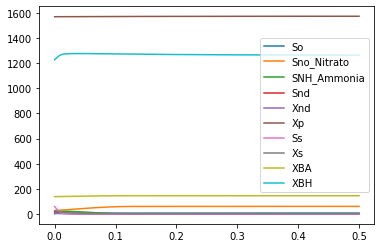

In [ ]:
plt.plot(t,Sovec)
plt.legend(('So','Sno_Nitrato','SNH_Ammonia','Snd','Xnd','Xp','Ss','Xs','XBA','XBH'))
plt.show

In [ ]:
print(Sovec)

So = Sovec[:,0]
print(np.mean(So))

[[2.00000000e+00 2.72000000e+01 1.39000000e+01 ... 2.66000000e+01
  1.38300000e+02 1.22710000e+03]
 [3.91181699e+00 2.75587387e+01 1.49221963e+01 ... 2.53882008e+01
  1.38384600e+02 1.23207079e+03]
 [4.44286317e+00 2.79359692e+01 1.58001697e+01 ... 2.42079121e+01
  1.38472114e+02 1.23691793e+03]
 ...
 [7.14084052e+00 6.06036205e+01 7.03190387e-01 ... 4.39460669e+00
  1.45143742e+02 1.26395557e+03]
 [7.14084097e+00 6.06040833e+01 7.03192899e-01 ... 4.39459341e+00
  1.45143409e+02 1.26394953e+03]
 [7.14084141e+00 6.06045435e+01 7.03195397e-01 ... 4.39458021e+00
  1.45143078e+02 1.26394351e+03]]
6.926654208564543


-----

#Simulação do controle
-----


In [ ]:
#Nova definição da função de simulação do tanque

def Tanque2(Y, t,   Roi =2, ai = 10361*0.8,tm=0.1,af=10361*0.8):   #Roi inicialment era uma constante igual a 2, mas depois assumiu o valor da equação da taxa (R) 
    So,Sno, SNH, Snd, Xnd, Xp, Ss, Xs, XBA, XBH = Y
    
    #Pergunta se o tempo de simulação é maior que o tempo onde será aplicada a mudança em areação.
    if t>tm:
      a = af
    else:
      a = ai
    #a = 497328*0,01     #esses valores era antes de ver a faixa de funcionamento de kla que é de a igual a zero ate 14000 m3/dia
    #a = 497328*0,005
    #a = 497328*0.0048
    teto = 100 #Teto fisico das concentrações

    #print(Y)
    YH =  0.67
    KS = 20
    koh = 0.20
    uh = 6
    ua =  0.8 #Pagina 20 modelo
    YA = 0.24
    KNH = 1
    koa = 0.4
    ng = 0.4
    kno = 0.5
    Koh = 0.2
    ka = 0.08
    kh = 3
    ixb = 0.086
    nh = 0.4
    kx = 0.03
    fp = 0.08
    ixp = 0.06
    ba = 0.05
    bh = 0.22
    Soin = 2
    Snoin = 27.2
    Sndin = 19.7
    SNHin = 13.9
    Ssin = 59.7
    XBAin = 138.3
    XBHin = 1227.1
    Xndin = 6.9
    Xpin = 1569.4
    Xsin = 26.6


    #Condições iniciais

    Soin = 2
    Somax = 8 #Trabalho de Ganesam

    #Condições do Tanque
    q= 2957  #m3/dia
    v= 526    # Cda trecho do tanque é 526 m3 (trab Matheus). Ganesan diz que o v total do tanque é 25070 m3. pag 25

    #Taxas de reacao correspondentes  

    M2 = (Ss / (KS + Ss))
    M8a = (So / (koa + So))
    M8h = (So / (Koh + So))
    M9 = (Sno / (kno + Sno))
    M10 = (SNH / (KNH + SNH)) 
    I8 = (Koh / (Koh + So))
    M1 = ((Xs / XBH)/(kx + (Xs/XBH)))
    M3 = ((Xnd / XBH)/(kx + (Xs/XBH)))

  
# So é o oxigenio soluvel, dissolvido

   # Ganesan diz que a formula do Kla vale para a= 0 a 14000m3/dia

    Kla = 1468.62*np.power(a,3.41) / (3.84e12 + np.power(a,3.41))    #confirmar o uso dessa eq Kla. Pelo que entendi é uma eq empririca para uso local da ETE de Chicago
    Roi = -uh*((1-YH)/YH)*(Ss/(KS+Ss))*(So/(koh+So))*XBH - (ua*((4.57-YA)/YA)*(SNH/(KNH+SNH))*(So/(koa+So))*XBA)   
    dSo = (q/v)*(Soin-So)+Kla*(Somax-So) + Roi   
  
    #if So>teto:
    #  dSo = 0 

# Sno é o nitrato soluvel e nitrogenio nitrito

    R = -uh*ng*((1-YH)/(2.86*YH))*(Ss/(KS+Ss))*(koh/(koh+So))*(Sno/(kno+Sno))*XBH + ((ua/YA)*((SNH/(KNH+SNH))*(So/(koa+So)))*XBA)
    dSno = (q/v)*(Snoin-Sno) + R   
    #print(dSno)
    #if (Sno>teto):
      
    #  dSno = 0  
    #print(R)
# SNH é o amonio soluvel e nitrogenio

    R = ((-ixb*uh)*M2*((M8h) + ng*(I8*M9)))*XBH - ua*(ixb + (1/ YA))*M10*M8a*XBA + (ka*Snd*XBH)   
    dSNH =  (q/v)*(SNHin-SNH) + R         

# Snd acho que é nitrogenio organico biodegradavel soluvel 

    R = (-ka*Snd*XBH) + kh*M3*((M8h) + ng*(I8*M9))*XBH   
    dSnd = (q/v)*(Sndin-Snd) + R
    #print(dSnd)

# Xnd é nitrogenio organico biodegradavel particulado  
   
    R = (ixb-(fp*ixp))*((bh*XBH) + (ba*XBA)) - kh*M3*((M8h)+ng*(I8*M9))*XBH     
    dXnd = (q/v)*(Xndin-Xnd) + R     

# Xp é produtos inerte particulado. Visto no artigo da bifurcacao Teymour; nao tem no artigo do Sidhu2009

    R = fp*(bh*XBH + ba*XBA)
    dXp = (q/v)*(Xpin-Xp) + R    

 # Ss substrato soluvel facilmente biodegradavel
    Ra = ((-uh/YH)*M2)*((M8h)+ ng*(I8*M9))*XBH
    Rb = kh*M1*((M8h) + ng*(I8*M9))*XBH
    R = Ra + Rb 
    dSs = (q/v)*(Ssin-Ss) + R

 # Xs substrato particulado lentamente biodegradavel

    R = (1-fp)*((bh*XBH) + (ba*XBA))-kh*M1*((M8h) + ng*(I8*M9))*XBH 
    dXs = (q/v)*(Xsin-Xs) + R           

 # XBA biomassa particulada autotrofica ativa

    R = (ua*M10*M8a*XBA) - (ba*XBA)
    dXBA = (q/v)*(XBAin-XBA) + R   

# XBH biomassa particulada heterotrofica ativa

    R = (uh*M2*M8h*XBH) + (uh*ng*M2*I8*M9*XBH) - (bh*XBH)
    dXBH = (q/v)*(XBHin-XBH) + R 



    return dSo,dSno,dSNH,dSnd,dXnd,dXp,dSs,dXs,dXBA,dXBH

In [ ]:
#Aqui é a simulação do controle

Soin = 2
Snoin = 27.2
Sndin = 19.7
SNHin = 13.9
Ssin = 59.7
XBAin = 138.3
XBHin = 1227.1
Xndin = 6.9
Xpin = 1569.4
Xsin = 26.6   

#VARIAVEIS PARA A SIMULAÇÃO DE CONTROLE
tempo_aplicar_mudanca = 0.2 #@param {type:"slider", min:0.05, max:0.5, step:0.05}
porcentagem_areacao_inicial= 100 #@param {type:"slider", min:0, max:100, step:5}
porcentagem_areacao_final= 30 #@param {type:"slider", min:0, max:100, step:5}



areacao_original = 10361*porcentagem_areacao_inicial/100
areacao_final = 10361*porcentagem_areacao_final/100

Condicoes_ini_tanque = (Soin,Snoin,SNHin,Sndin,Xndin,Xpin,Ssin,Xsin,XBAin,XBHin)   #Condicoes iniciais para cada variavel, respectivamente, declarada la em cima
Sovec_controle_01  = integrate.odeint(Tanque2, Condicoes_ini_tanque , t, args=( 2,areacao_original,tempo_aplicar_mudanca,areacao_final))
dataC = pd.DataFrame(Sovec_controle_01,columns = ['So','Sno_Nitrato','SNH_Ammonia','Snd','Xnd','Xp','Ss','Xs','XBA','XBH'])
dataC['t']= t*24
dataC['limite']=2  #Cria um valor para o limite q aparecerá no gráfico, neste caso escolhi o 2
dataC ['nindex'] = 2
dataC = dataC.set_index('nindex')



## TRecho para simular com a areação original, Repete a simulação acima, contudo, não muda o nivel de areação
areacao_final = areacao_original  #areação final é igual a areação inicial.

Sovec_controle_00  = integrate.odeint(Tanque2, Condicoes_ini_tanque , t, args=( 2,areacao_original,tempo_aplicar_mudanca,areacao_final))
dataC0 = pd.DataFrame(Sovec_controle_00,columns = ['So','Sno_Nitrato','SNH_Ammonia','Snd','Xnd','Xp','Ss','Xs','XBA','XBH'])
dataC0['t']= t
dataC0['limite']=2  #Cria um valor para o limite q aparecerá no gráfico, neste caso escolhi o 2
dataC0 ['nindex'] = 2
dataC0 = dataC0.set_index('nindex')

#Adiciona o resultado do SO original na simulação do controle
dataC['So_Original'] = dataC0['So'] 


#Nomes das variaveis que querem ser apresentadas
nomes_dos_dados =['So','limite','So_Original'] #Sao colocados os itens que devem ser graficados


########################
#Graficar resultados
########################
#Comando básico para graficar
fig = px.line(
data_frame = dataC,    
x = 't',  
y = nomes_dos_dados,
template =  "plotly_white", 
title = "Oxigenio Dissolvido com mudança de areação" 
)

#Códigos para melhorar o grafico
fig.update_traces(line=dict(width=4)) #Define aqui a largura das linhas do grafico neste caso com largura = 4
fig.update_layout(font_family="Courier New",font_size = 16) #Define aqui o tipo de Fonte e o tamanho
fig.update_traces(patch={"line": { "dash": 'dot'}}, selector={"legendgroup": "limite"})  #Define aqui o tipo de linha para a linha do limite
fig.update_layout(legend_title=dict(text = '')) #Coloca um texto explicando as legendas.. neste caso deixei sem
fig.update_layout(xaxis_title='Tempo (dias)',  yaxis_title='Unidades do oxigenio dissolvido') #titulos dos eixos X e Y


fig.show()